In [2]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [3]:
from google.colab import files
uploaded = files.upload()

In [7]:
data = pd.read_csv('/content/sample_data/golf_df.csv')

In [ ]:
data


In [8]:
one_hot_data = pd.get_dummies(data[['Outlook', 'Temperature', 'Humidity', 'Windy']])

In [ ]:
print(one_hot_data)

    Windy  Outlook_overcast  Outlook_rainy  Outlook_sunny  Temperature_cool  \
0   False                 0              0              1                 0   
1    True                 0              0              1                 0   
2   False                 1              0              0                 0   
3   False                 0              1              0                 0   
4   False                 0              1              0                 1   
5    True                 0              1              0                 1   
6    True                 1              0              0                 1   
7   False                 0              0              1                 0   
8   False                 0              0              1                 1   
9   False                 0              1              0                 0   
10   True                 0              0              1                 0   
11   True                 1              0          

In [9]:
#creating decicion tree classidier
clf = tree.DecisionTreeClassifier()

#training the decision tree
clf_train = clf.fit(one_hot_data, data['Play'])

In [10]:
dot_data = tree.export_graphviz(clf_train, out_file = None, feature_names = list(one_hot_data.columns.values))
print(dot_data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Outlook_overcast <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="Humidity_normal <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Outlook_rainy <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 3 ;
4 [label="Windy <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="Windy <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="Temperature_mild <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [

In [11]:
dot_data = tree.export_graphviz(clf_train, out_file = None, feature_names = list(one_hot_data.columns.values),class_names=list(one_hot_data.columns.values),rounded= True, filled =True)
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = iris.feature_names,
#                 class_names = iris.target_names,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data) 



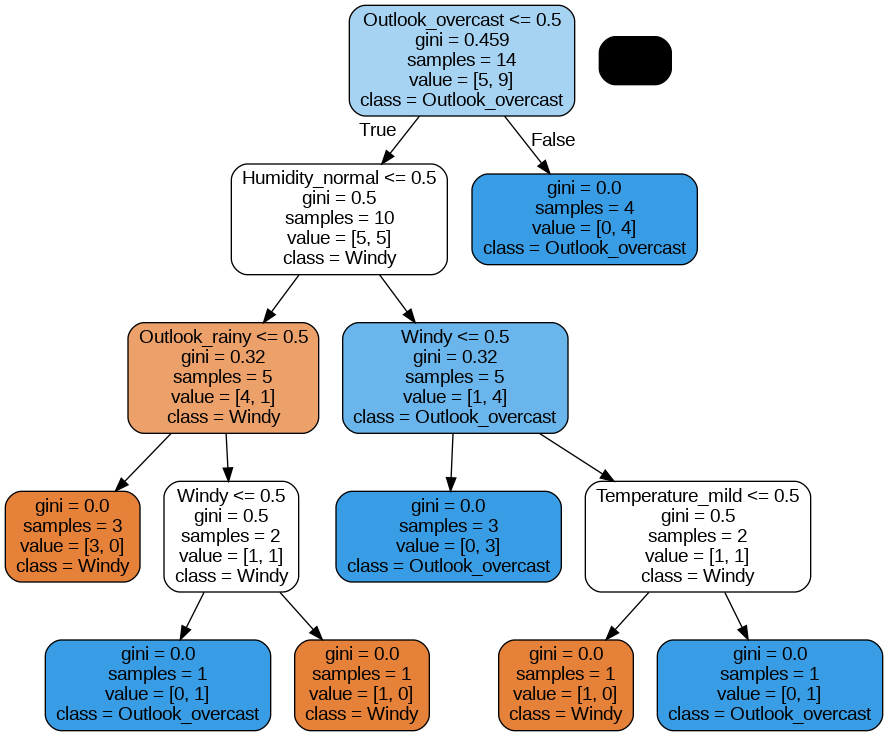

In [12]:
#Showing graph
Image(graph.create_png())

In [16]:
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1]])
print(prediction)

['yes']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
